In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import tqdm

In [6]:
train_features = np.load('../data/X_train_encoded.npy')
validation_features = np.load('../data/X_validation_encoded.npy')

In [11]:
train_features.shape

(197181, 256)

Clustering: 100%|██████████| 18/18 [02:39<00:00,  8.85s/it]


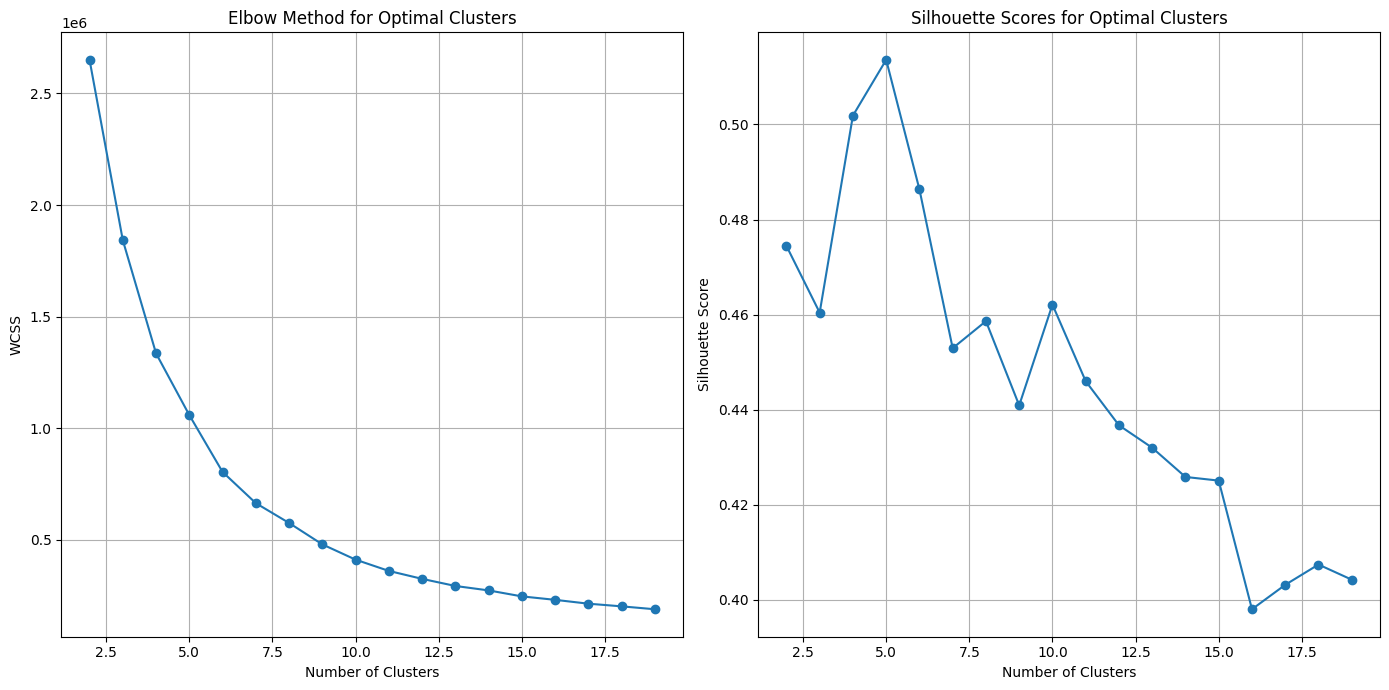

In [35]:
# Take a random subset of the data
subset_size = 20000  # Adjust the subset size as needed
indices = np.random.choice(train_features.shape[0], subset_size, replace=False)
train_features_subset = train_features[indices]

# Normalize the features
# scaler = StandardScaler()
# features_normalized = scaler.fit_transform(train_features_subset)

# Apply PCA for dimensionality reduction


# Define the range for the number of clusters
cluster_range = range(2, 20)

# Initialize lists to store the results
wcss = []
silhouette_scores = []

# Loop through the range and calculate WCSS and Silhouette Score with progress bar
for n_clusters in tqdm(cluster_range, desc="Clustering"):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(train_features_subset)
    
    # Calculate WCSS
    wcss.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(train_features_subset, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow method
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)

# Plot the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

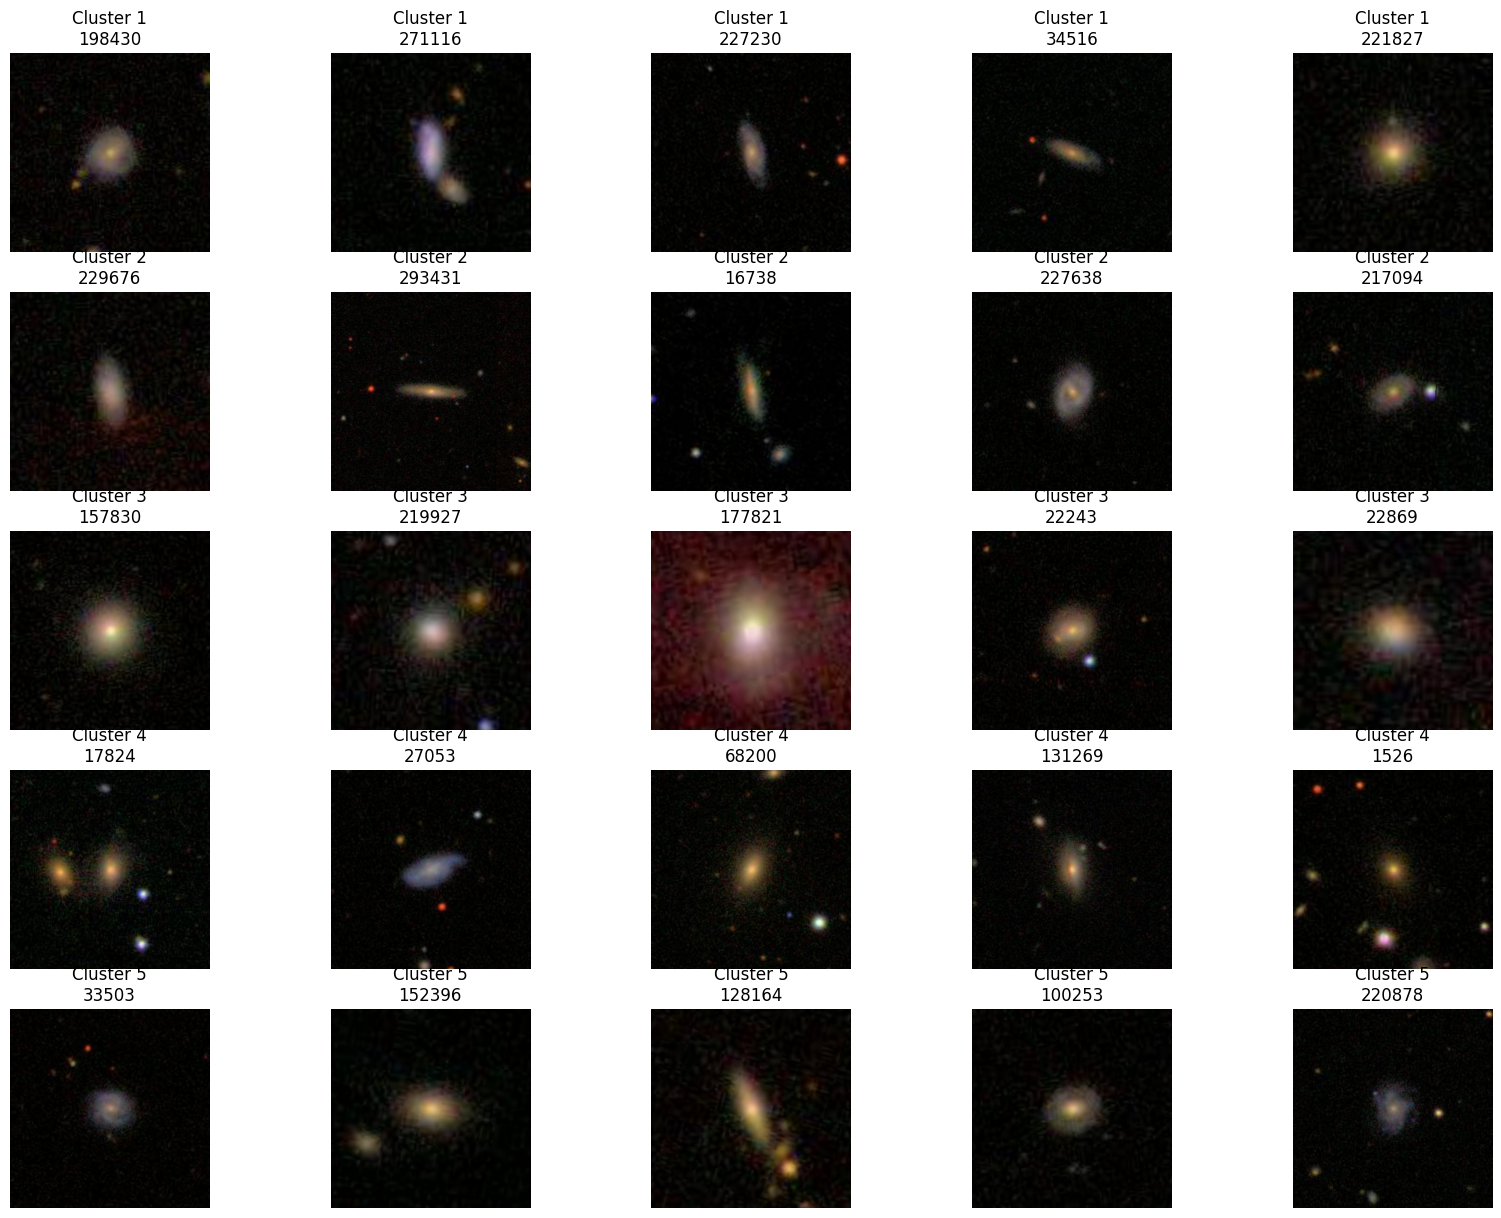

In [36]:
import os
import matplotlib.pyplot as plt
import numpy as np

def plot_original_images(images_dir, asset_ids, cluster_labels, n_clusters, n_images_per_cluster=5):
    plt.figure(figsize=(20, n_clusters * 3))
    for cluster in range(n_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        cluster_asset_ids = [asset_ids[i] for i in cluster_indices]
        cluster_images = [os.path.join(images_dir, str(asset_id) + '.jpg') for asset_id in cluster_asset_ids]

        
        for i in range(min(n_images_per_cluster, len(cluster_asset_ids))):
            plt.subplot(n_clusters, n_images_per_cluster, cluster * n_images_per_cluster + i + 1)
            img = plt.imread(cluster_images[i])
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'Cluster {cluster + 1}\n{cluster_asset_ids[i]}')
    plt.show()

# Assuming you have the directory where your images are stored and asset IDs corresponding to train features
images_dir = '../data/galaxy_zoo'
asset_ids = np.load('../data/Y_train.npy')  # Assuming this contains asset IDs

# Assuming you determined the optimal number of clusters
optimal_n_clusters = 5
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(train_features)

# Plot original images in clusters
plot_original_images(images_dir, asset_ids, cluster_labels, optimal_n_clusters)

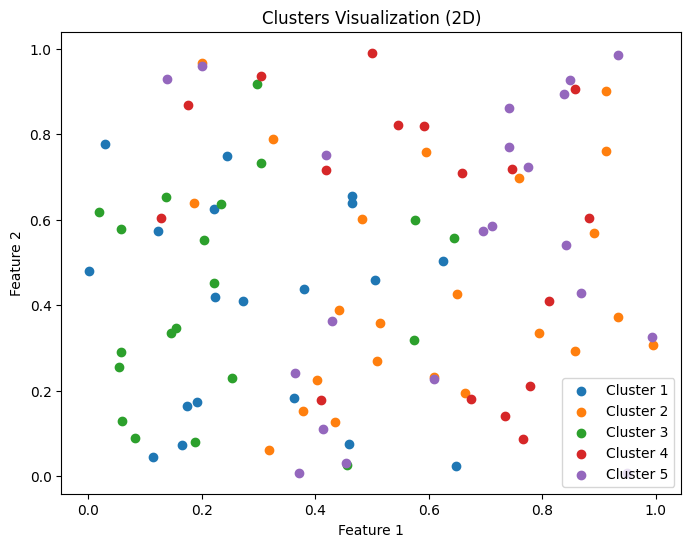

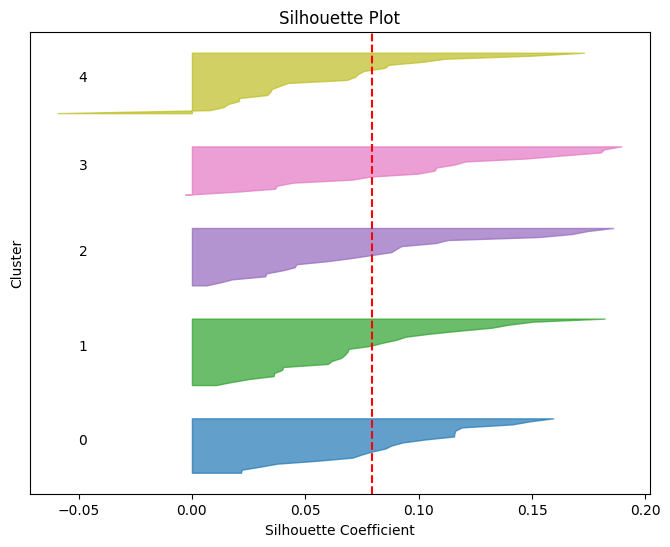

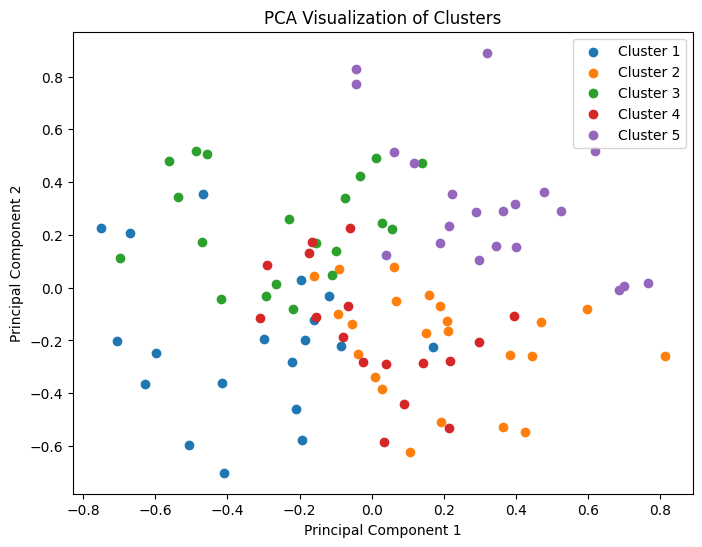

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

def plot_clusters_scatter(features, cluster_labels, n_clusters):
    plt.figure(figsize=(8, 6))
    for cluster in range(n_clusters):
        cluster_data = features[cluster_labels == cluster]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster + 1}')
    plt.title('Clusters Visualization (2D)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def plot_silhouette(scores, cluster_labels):
    plt.figure(figsize=(8, 6))
    silhouette_avg = silhouette_score(scores, cluster_labels)
    sample_silhouette_values = silhouette_samples(scores, cluster_labels)
    y_lower = 10
    for i in range(len(np.unique(cluster_labels))):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.tab10(i / len(np.unique(cluster_labels)))
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.title('Silhouette Plot')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster')
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([])
    plt.show()

def plot_pca(features, cluster_labels, n_clusters):
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(features)
    plt.figure(figsize=(8, 6))
    for cluster in range(n_clusters):
        cluster_data = reduced_features[cluster_labels == cluster]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster + 1}')
    plt.title('PCA Visualization of Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Assuming you have your features and cluster labels
features = np.random.rand(100, 10)  # Example features
n_clusters = 5  # Number of clusters
cluster_labels = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(features)

# Plotting
plot_clusters_scatter(features, cluster_labels, n_clusters)
plot_silhouette(features, cluster_labels)
plot_pca(features, cluster_labels, n_clusters)

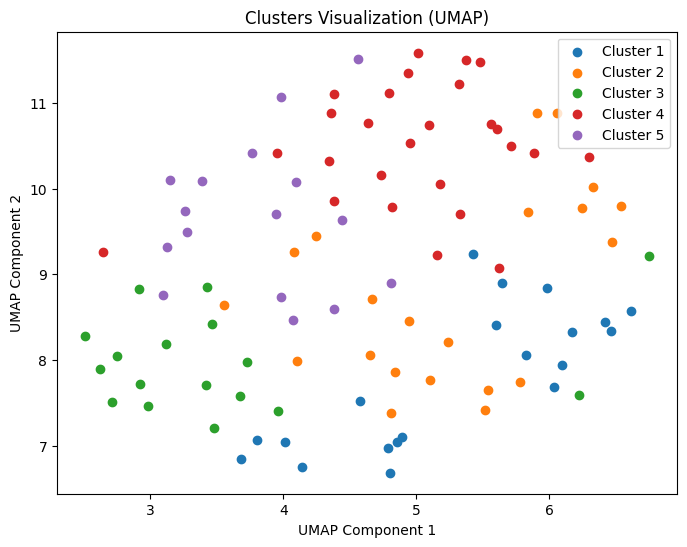

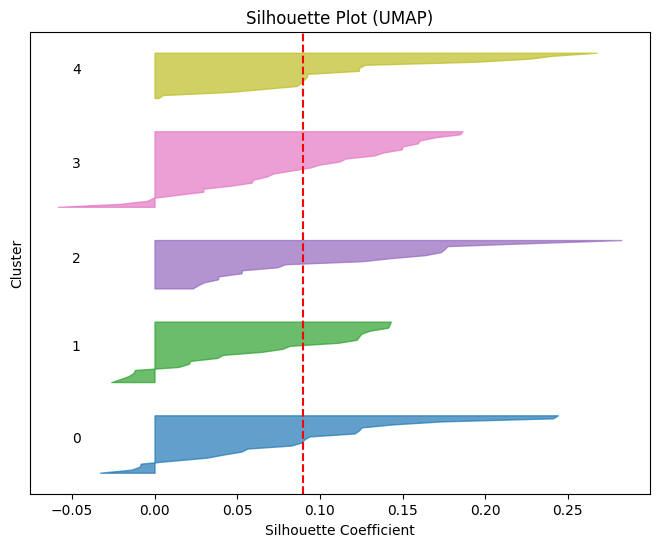

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import umap.umap_ as umap
from sklearn.cluster import KMeans

def plot_clusters_scatter_umap(features, cluster_labels, n_clusters):
    umap_model = umap.UMAP(n_components=2)
    umap_features = umap_model.fit_transform(features)
    plt.figure(figsize=(8, 6))
    for cluster in range(n_clusters):
        cluster_data = umap_features[cluster_labels == cluster]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster + 1}')
    plt.title('Clusters Visualization (UMAP)')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.legend()
    plt.show()

def plot_silhouette_umap(features, cluster_labels):
    plt.figure(figsize=(8, 6))
    silhouette_avg = silhouette_score(features, cluster_labels)
    sample_silhouette_values = silhouette_samples(features, cluster_labels)
    y_lower = 10
    for i in range(len(np.unique(cluster_labels))):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.tab10(i / len(np.unique(cluster_labels)))
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.title('Silhouette Plot (UMAP)')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster')
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([])
    plt.show()

# Assuming you have your features and cluster labels
features = np.random.rand(100, 10)  # Example features
n_clusters = 5  # Number of clusters
cluster_labels = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(features)

# Plotting
plot_clusters_scatter_umap(features, cluster_labels, n_clusters)
plot_silhouette_umap(features, cluster_labels)


Clustering: 100%|██████████| 9/9 [00:50<00:00,  5.64s/it]


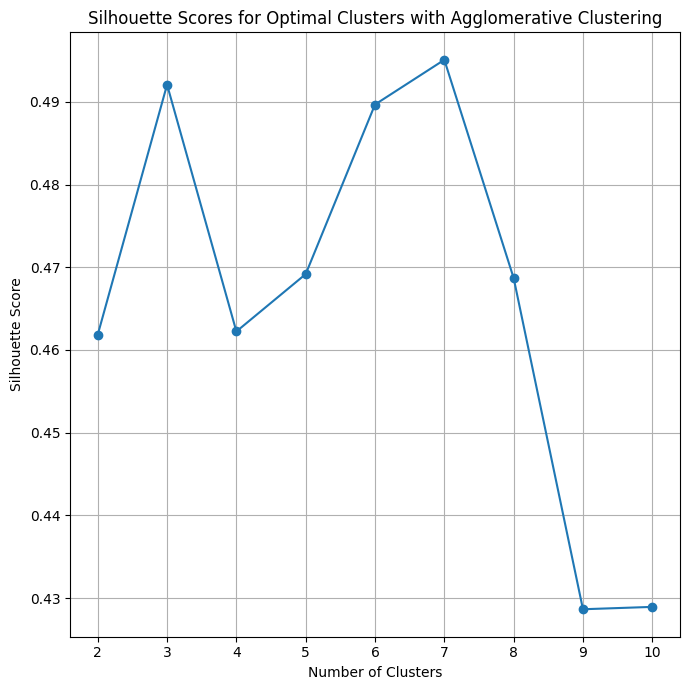

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster_range = range(2, 11)

# Initialize lists to store the results
silhouette_scores = []

# Loop through the range and calculate Silhouette Score with progress bar
for n_clusters in tqdm(cluster_range, desc="Clustering"):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglomerative.fit_predict(features_reduced)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(features_reduced, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(7, 7))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Clusters with Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()